What happens to NIFTY for a week if Monday is in deep red?

n : Percent down change greater than n on monday

In [28]:
n = -2

In [38]:
import numpy as np
import pandas as pd

from scipy import stats

import datetime
from datetime import timedelta

import niftyutils
from niftyutils import load_nifty_data

import matplotlib.pyplot as plt
import mplfinance as fplt

In [14]:
start_date = datetime.datetime(2005,8,1)
end_date = datetime.datetime(2020,8,29)
nifty_data = load_nifty_data(start_date,end_date)

In [15]:
daily_returns = (nifty_data['Close']/nifty_data['Close'].shift(1) - 1)*100
daily_returns = daily_returns.dropna()

In [64]:
four_days_returns = (nifty_data['Close']/nifty_data['Close'].shift(4) - 1)*100
four_days_returns = four_days_returns.dropna()

# 3 days return to be calculated for truncated weeks
three_days_returns = (nifty_data['Close']/nifty_data['Close'].shift(3) - 1)*100
three_days_returns = three_days_returns.dropna()

#### Filter mondays and study returns

In [71]:
mondays = daily_returns[(daily_returns.index.weekday == 0)]

In [74]:
monday_weekly_returns = []
for date in mondays.index:
    try:
        ret = four_days_returns[niftyutils.datetime_to_datetime_str(date +  timedelta(days=4))]
        monday_weekly_returns.append((date,ret))
    except KeyError:
        pass
        #print('Truncated week for ~ %s' % date)

In [75]:
weekly_returns_after_monday = pd.DataFrame(monday_weekly_returns).set_index(0)[1]

In [77]:
weekly_returns_after_monday.describe()

count    698.000000
mean       0.190302
std        2.768125
min      -17.253747
25%       -1.190761
50%        0.305454
75%        1.692017
max       13.797181
Name: 1, dtype: float64

#### Filter only monday with greater down move than n

In [36]:
blood_mondays = daily_returns[(daily_returns.index.weekday == 0) & (daily_returns <= n)]

In [66]:
blood_monday_weekly_returns = []
for date in blood_mondays.index:
    try:
        ret = four_days_returns[niftyutils.datetime_to_datetime_str(date +  timedelta(days=4))]
        blood_monday_weekly_returns.append((date,ret))
    except KeyError:
        print('Truncated week for ~ %s' % date)

Truncated week for ~ 2007-02-12 00:00:00
Truncated week for ~ 2007-04-02 00:00:00
Truncated week for ~ 2007-12-17 00:00:00
Truncated week for ~ 2008-03-17 00:00:00
Truncated week for ~ 2009-03-30 00:00:00


In [68]:
weekly_returns_after_blood_monday = pd.DataFrame(blood_monday_weekly_returns).set_index(0)[1]

In [70]:
weekly_returns_after_blood_monday.describe()

count    53.000000
mean      0.049876
std       5.018419
min     -14.099206
25%      -2.437976
50%      -0.052775
75%       3.340612
max      13.797181
Name: 1, dtype: float64

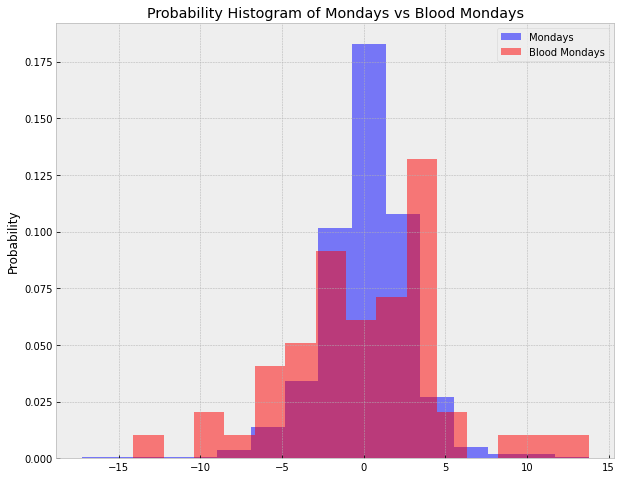

In [107]:
plt.figure(figsize=[10,8])
plt.style.use("bmh")
kwargs = dict(alpha=0.5, bins=15, density=True, stacked=True)

plt.hist(weekly_returns_after_monday, **kwargs, color='b', label='Mondays')
plt.hist(weekly_returns_after_blood_monday, **kwargs, color='r', label='Blood Mondays')
plt.gca().set(title='Probability Histogram of Mondays vs Blood Mondays', ylabel='Probability')
plt.legend();

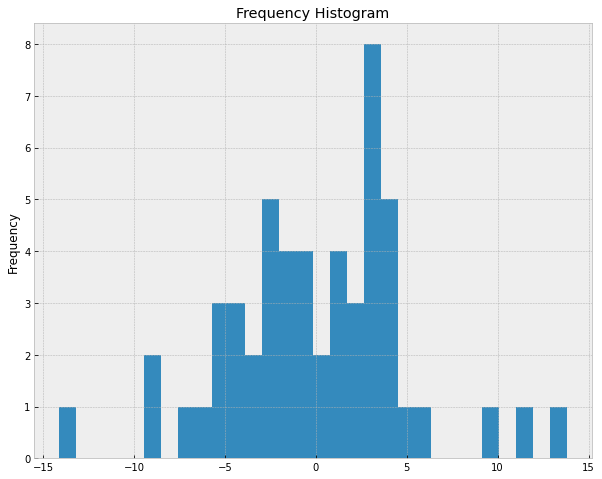

In [109]:
plt.figure(figsize=[10,8])
plt.style.use("bmh")

plt.hist(weekly_returns_after_blood_monday, bins=30)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');